<a href="https://colab.research.google.com/github/ankesh86/TimeSeriesAnalysis/blob/main/Forecasting_DeepLearningMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time-Series Forecasting using LSTM**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing


In [3]:
from sklearn.metrics import r2_score
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

## Importing the data

In [14]:
import requests

#data
urlA = 'https://raw.githubusercontent.com/ankesh86/TimeSeriesAnalysis/master/Data/DOM_hourly.csv'

data = pd.read_csv(urlA, index_col='Datetime', parse_dates=['Datetime'])
data.head()


,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0


In [15]:
data.isna().sum()


DOM_MW    0
dtype: int64

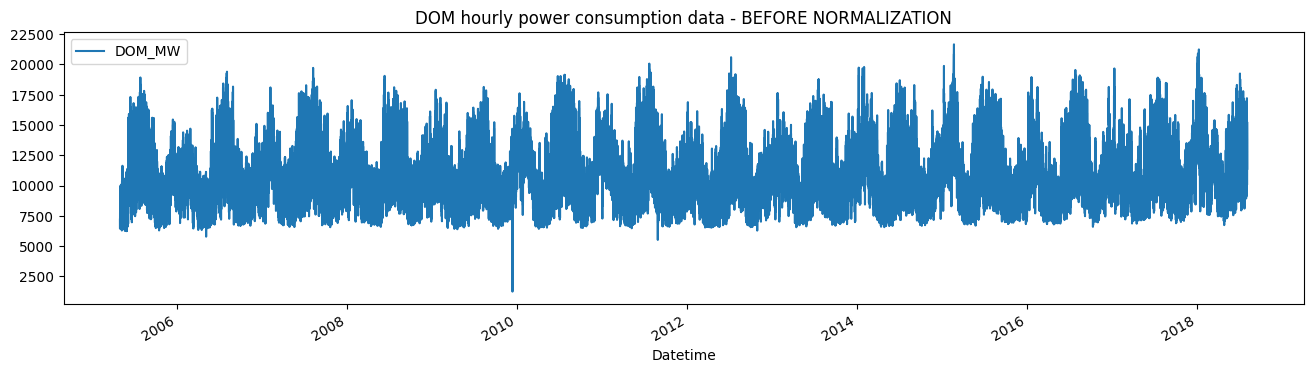

In [16]:
data.plot(figsize=(16,4), legend=True)
plt.title('DOM hourly power consumption data - BEFORE NORMALIZATION')
plt.show()

In [19]:
def data_prep(data, length):
  X=[]
  y=[]

  for i in range(length, len(data)):
    X.append(data.iloc[i - length:i, 0])
    y.append(data.iloc[i,0])

  #test-train split
  train_X = X[:110000]
  train_y = y[:110000]

  train_X = np.array(train_X)
  train_y = np.array(train_y)

  test_X = X[110000:]
  test_y = y[110000:]

  test_X = np.array(test_X)
  test_y = np.array(test_y)

  #reshaping data to required format to input to RNN, LSTM models

  train_X = np.reshape(train_X, (110000, length, 1))
  test_X = np.reshape(test_X, (test_X.shape[0], length, 1))

  return [train_X, train_y, test_X, test_y]



In [20]:
seq_length = 20
train_X, train_y, test_X, test_y = data_prep(data, seq_length)

print('train_X.shape = ',train_X.shape)
print('train_y.shape = ',train_y.shape)
print('test_X.shape = ',test_X.shape)
print('test_y.shape = ',test_y.shape)

train_X.shape =  (110000, 20, 1)
train_y.shape =  (110000,)
test_X.shape =  (6169, 20, 1)
test_y.shape =  (6169,)


In [21]:
model = Sequential()
model.add(LSTM(40, activation="tanh", return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(Dropout(0.15))

model.add(LSTM(40, activation="tanh", return_sequences=True))
model.add(Dropout(0.15))

model.add(LSTM(40, activation="tanh", return_sequences=True))
model.add(Dropout(0.15))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 40)            6720      
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 40)            12960     
                                                                 
 dropout_1 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 40)            12960     
                                                                 
 dropout_2 (Dropout)         (None, 20, 40)            0         
                                                                 
 dense (Dense)               (None, 20, 1)             4

In [22]:
#fit the model
model.compile(optimizer="adam", loss="MSE")
model.fit(train_X, train_y, epochs=10, batch_size=1000)

Epoch 1/10
110/110 [==============================] - 52s 401ms/step - loss: 124605680.0000
Epoch 2/10
110/110 [==============================] - 45s 414ms/step - loss: 124454472.0000
Epoch 3/10
110/110 [==============================] - 62s 566ms/step - loss: 124343056.0000
Epoch 4/10
110/110 [==============================] - 54s 493ms/step - loss: 124237808.0000
Epoch 5/10
110/110 [==============================] - 58s 529ms/step - loss: 124135528.0000
Epoch 6/10
110/110 [==============================] - 63s 573ms/step - loss: 124034680.0000
Epoch 7/10
110/110 [==============================] - 65s 588ms/step - loss: 123935000.0000
Epoch 8/10
110/110 [==============================] - 56s 509ms/step - loss: 123836016.0000
Epoch 9/10
110/110 [==============================] - 51s 467ms/step - loss: 123737440.0000
Epoch 10/10
110/110 [==============================] - 45s 407ms/step - loss: 123639392.0000


In [24]:
predictions = model.predict(test_X)
score = r2_score(test_y, predictions)
print("R-Squared Score of LSTM model", score)

193/193 [==============================] - 3s 8ms/step


ValueError: Found array with dim 3. None expected <= 2.

In [23]:
def plotting_actual_vs_pred(y_test, y_pred, title):
  plt.figure(figsize=(16,4))
  plt.plot(y_test, color='blue', label='Actual power consumption data')
  plt.plot(y_pred, alpha=0.7, color='orange', label='Predicted power consumption data')
  plt.title(title)
  plt.xlabel('Time')
  plt.ylabel('Normalized power cosumption scale')
  plt.legend()
  plt.show()


In [ ]:
plotting_actual_vs_pred(test_y, predictions, "Predictions made by LSTM model")